# Cleaning and analyzing Position vs Salary data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats

# File to Load (Remember to Change These)
nba_salary_to_load = "input/nba_2017_nba_players_with_salary.csv"

# Read School and Student Data File and store into Pandas Data Frames
nba_salary_df = pd.read_csv(nba_salary_to_load)

nba_salary_df 

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96
5,5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33
6,6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,...,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96
7,7,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,...,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64
8,8,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,...,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11
9,9,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,...,72,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64


In [3]:
# Dropping UnNamed Column
nba_salary_df = nba_salary_df.loc[:, ~nba_salary_df.columns.str.contains('^Unnamed')]
nba_salary_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [4]:
# Showing counts of each position
counts = nba_salary_df.groupby(["POSITION"]).count()
counts

,Rk,PLAYER,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
POSITION,,,,,,,,,,,,,,,,,,,,,
C,67,67,67,67,67,67,67,67,67,49,...,67,67,67,67,67,67,67,67,67,67
PF,70,70,70,70,70,70,70,70,70,66,...,70,70,70,70,70,70,70,70,70,70
PF-C,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
PG,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
SF,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
SG,68,68,68,68,68,68,68,68,68,68,...,68,68,68,68,68,68,68,68,68,68


In [5]:
# Combining redundant positions together
reduced_nba_salary_df = nba_salary_df.replace({"PF-C": "PF"})
reduced_nba_salary_df.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [6]:
# Average Salary for each position
average_position_salary = pd.DataFrame(reduced_nba_salary_df.groupby(["POSITION"]).mean()["SALARY_MILLIONS"])
average_position_salary


,SALARY_MILLIONS
POSITION,
C,8.037463
PF,6.904722
PG,7.293286
SF,7.768462
SG,6.520882


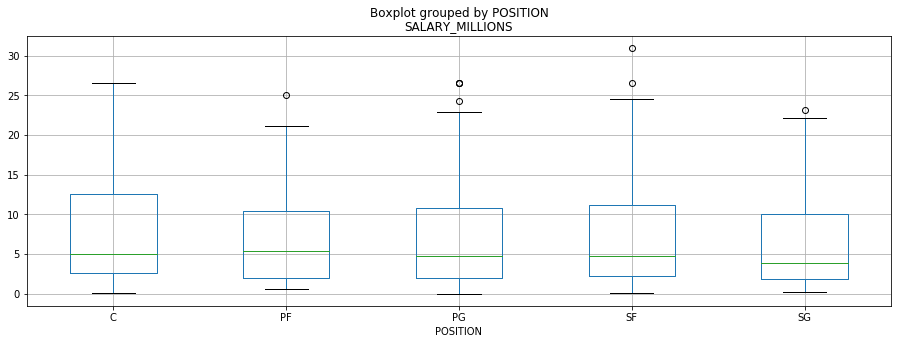

In [7]:
# Create a boxplot to compare means
reduced_nba_salary_df.boxplot("SALARY_MILLIONS", by="POSITION", figsize=(15, 5))
# Save plot
plt.savefig('output/boxplot.png')

In [8]:
# All NBA Salaries
nba = reduced_nba_salary_df["SALARY_MILLIONS"]

# Extract individual groups
centers = reduced_nba_salary_df[reduced_nba_salary_df["POSITION"] == "C"]["SALARY_MILLIONS"]
power_forward = reduced_nba_salary_df[reduced_nba_salary_df["POSITION"] == "PF"]["SALARY_MILLIONS"]
point_guard = reduced_nba_salary_df[reduced_nba_salary_df["POSITION"] == "PG"]["SALARY_MILLIONS"]
small_forward = reduced_nba_salary_df[reduced_nba_salary_df["POSITION"] == "SF"]["SALARY_MILLIONS"]
shooting_guard = reduced_nba_salary_df[reduced_nba_salary_df["POSITION"] == "SG"]["SALARY_MILLIONS"]

In [9]:
# Perform the ANOVA
print("ANOVA Test for NBA Positions:")
stats.f_oneway(centers, power_forward, point_guard, small_forward, shooting_guard)

ANOVA Test for NBA Positions:


F_onewayResult(statistic=0.6049008695778558, pvalue=0.6593591560993395)

In [10]:
nba_mean = reduced_nba_salary_df.mean()["SALARY_MILLIONS"]
nba_mean


7.294005847953212

In [11]:
print("T-Test for Centers:")
print(stats.ttest_1samp(centers, nba_mean))
print("--------------------------")
print("T-Test for Power Forward:")
print(stats.ttest_1samp(power_forward, nba_mean))
print("--------------------------")
print("T-Test for Point Guard:")
print(stats.ttest_1samp(point_guard, nba_mean))
print("--------------------------")
print("T-Test for Small Forward:")
print(stats.ttest_1samp(small_forward, nba_mean))
print("--------------------------")
print("T-Test for Shooting Guard:")
print(stats.ttest_1samp(shooting_guard, nba_mean))
print("--------------------------")

T-Test for Centers:
Ttest_1sampResult(statistic=0.9100011078873185, pvalue=0.3661333477105093)
--------------------------
T-Test for Power Forward:
Ttest_1sampResult(statistic=-0.5597835668494989, pvalue=0.5773889161740999)
--------------------------
T-Test for Point Guard:
Ttest_1sampResult(statistic=-0.0008559069003747678, pvalue=0.9993195549489876)
--------------------------
T-Test for Small Forward:
Ttest_1sampResult(statistic=0.5342747981878027, pvalue=0.5950025561511766)
--------------------------
T-Test for Shooting Guard:
Ttest_1sampResult(statistic=-1.0994133004684972, pvalue=0.2755226276532566)
--------------------------


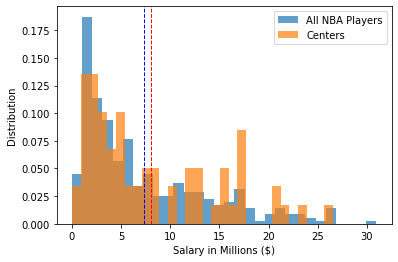

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot for Centers

# Histogram Plot of Data
plt.hist(nba, 30, density=True, alpha=0.7, label="All NBA Players")
plt.hist(centers, 30, density=True, alpha=0.7, label="Centers")
plt.axvline(nba.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(centers.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Salary in Millions ($)")
plt.ylabel("Distribution")
plt.legend()  

plt.show()
# Save plot
plt.savefig('output/centers.png')

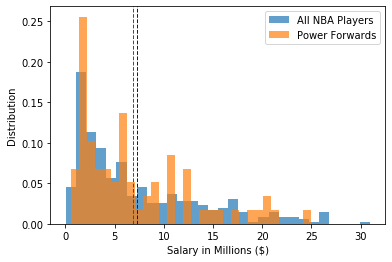

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot for Power Forwards



# Histogram Plot of Data
plt.hist(nba, 30, density=True, alpha=0.7, label="All NBA Players")
plt.hist(power_forward, 30, density=True, alpha=0.7, label="Power Forwards")
plt.axvline(nba.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(power_forward.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Salary in Millions ($)")
plt.ylabel("Distribution")
plt.legend()  

plt.show()
# Save plot
plt.savefig('output/pforwards.png')

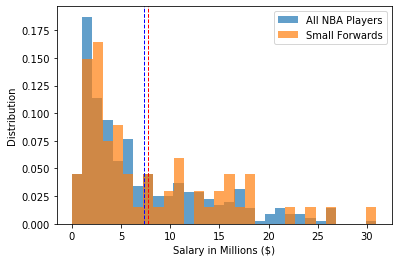

<Figure size 432x288 with 0 Axes>

In [16]:
# Plot for Small Forwards


# Histogram Plot of Data

plt.hist(nba, 30, density=True, alpha=0.7, label="All NBA Players")
plt.hist(small_forward, 30, density=True, alpha=0.7, label="Small Forwards")
plt.axvline(nba.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(small_forward.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Salary in Millions ($)")
plt.ylabel("Distribution")
plt.legend()  

plt.show()
# Save plot
plt.savefig('output/sforwards.png')

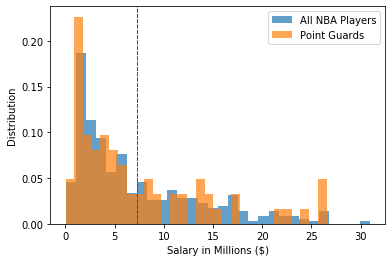

<Figure size 432x288 with 0 Axes>

In [17]:
# Plot for Point Guards


# Histogram Plot of Data
plt.hist(nba, 30, density=True, alpha=0.7, label="All NBA Players")
plt.hist(point_guard, 30, density=True, alpha=0.7, label="Point Guards")
plt.axvline(nba.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(point_guard.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Salary in Millions ($)")
plt.ylabel("Distribution")
plt.legend()  

plt.show()
# Save plot
plt.savefig('output/pguards.png')

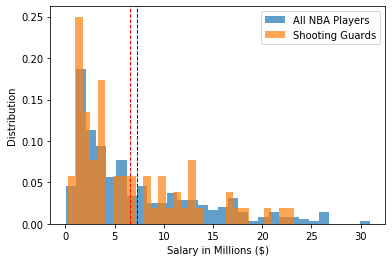

<Figure size 432x288 with 0 Axes>

In [18]:
# Plot for Shooting Guards

# Histogram Plot of Data
plt.hist(nba, 30, density=True, alpha=0.7, label="All NBA Players")
plt.hist(shooting_guard, 30, density=True, alpha=0.7, label="Shooting Guards")
plt.axvline(nba.mean(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(shooting_guard.mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Salary in Millions ($)")
plt.ylabel("Distribution")
plt.legend()  

plt.show()
# Save plot
plt.savefig('output/sguards.png')